In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [15]:
data = pd.read_csv("data/paint.csv")

data.shape
data.head()
data.describe()

,Comisiones,Llamadas,Millas_recorridas
count,25.000000,25.000000,25.00000
mean,31.360000,140.440000,2796.16000
std,10.156607,6.621178,431.75009
min,13.000000,127.000000,2121.00000
25%,25.000000,135.000000,2371.00000
50%,33.000000,142.000000,2829.00000
75%,38.000000,144.000000,3114.00000
max,47.000000,154.000000,3463.00000


In [16]:
dataX = data[["Millas_recorridas","Llamadas"]]

XY_train = np.array(dataX)
z_train = data["Comisiones"].values


In [17]:
regr = linear_model.LinearRegression()
regr.fit(XY_train, z_train)

z_pred = regr.predict(XY_train)

print("Coeficientes:\n", regr.coef_)
print("Interseccion:\n", regr.intercept_)
print("Error cuadratico medio: %.2f" % mean_squared_error(z_train, z_pred))
print("Varianza (R2): %.2f" % r2_score(z_train, z_pred))


Coeficientes:
 [0.01568925 0.63233256]
Interseccion:
 -101.31444968276467
Error cuadratico medio: 16.31
Varianza (R2): 0.84


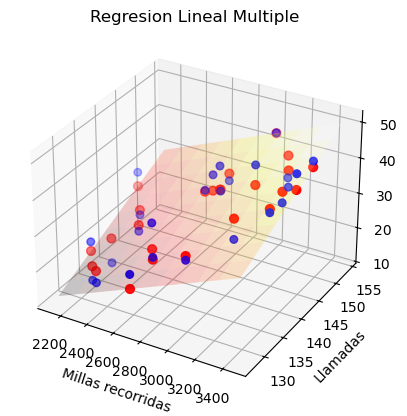

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xx, yy = np.meshgrid(
    np.linspace(data["Millas_recorridas"].min(), data["Millas_recorridas"].max(), 10),
    np.linspace(data["Llamadas"].min(), data["Llamadas"].max(), 10)
)

nuevoX = regr.coef_[0] * xx
nuevoY = regr.coef_[1] * yy
z = nuevoX + nuevoY + regr.intercept_

ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot')

ax.scatter(XY_train[:,0], XY_train[:,1], z_train, c='blue', s=30)
ax.scatter(XY_train[:,0], XY_train[:,1], z_pred, c='red', s=40)

ax.set_xlabel('Millas recorridas')
ax.set_ylabel('Llamadas')
ax.set_zlabel('Comisiones')
ax.set_title('Regresion Lineal Multiple')

plt.show()


Ganan mas comisisones los generentes que tienen mas numeros de llamadas y de millas recorridas? si,

hay una interaccion significativa entre el numero de llamadas de ventas y las millas recorridas: por lo que puedo notar los gerentes, que hagan mas llamadas que millas tienden a ganar muchisimas mas comisiones que los gerentes, que tengan mas millas que llamadas, por lo que para maximisar las comisiones, lo mejor serie hacer mas llamadas en cualquier caso.